In [1]:
# Autoencoder BY Nkenfa Brandon & Lantum Brendan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


2025-06-15 11:26:20.018633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749983180.089057  116632 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749983180.108400  116632 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749983180.235214  116632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749983180.235246  116632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749983180.235264  116632 computation_placer.cc:177] computation placer alr

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test),  np.prod(x_test.shape[1:])))

In [6]:
encoding_dim = 32  

In [7]:
input_img = Input(shape=(784,))

In [8]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

2025-06-15 11:26:23.909703: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
decoded = Dense(784, activation='sigmoid')(encoded)

In [10]:
autoencoder = Model(inputs=input_img, outputs=decoded)

In [11]:
encoder = Model(inputs=input_img, outputs=encoded)

In [12]:
encoded_input = Input(shape=(encoding_dim,))

In [13]:
decoder_layer = autoencoder.layers[-1]

In [14]:
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [16]:
history = autoencoder.fit(
    x_train, x_train,               
    epochs=50,                      
    batch_size=256,                 
    shuffle=True,                   
    validation_data=(x_test, x_test)  
)

2025-06-15 11:26:24.076434: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-06-15 11:26:24.448060: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3810 - val_loss: 0.1884
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1788 - val_loss: 0.1526
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1482 - val_loss: 0.1331
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1310 - val_loss: 0.1210
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1200 - val_loss: 0.1124
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1121 - val_loss: 0.1063
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1063 - val_loss: 0.1019
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1023 - val_loss: 0.0989
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0996 - val_loss: 0.0966
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0975 - val_loss: 0.0951
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0959 - val_loss: 0.0942
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

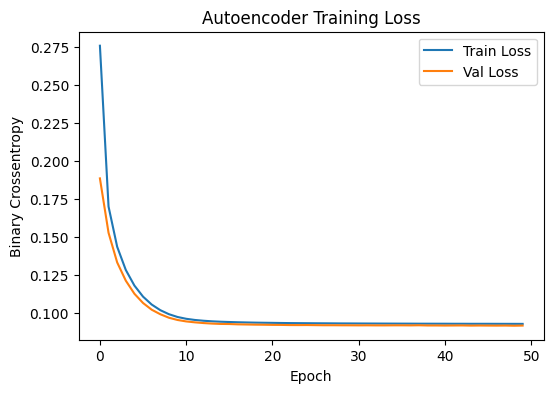

In [17]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

In [18]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


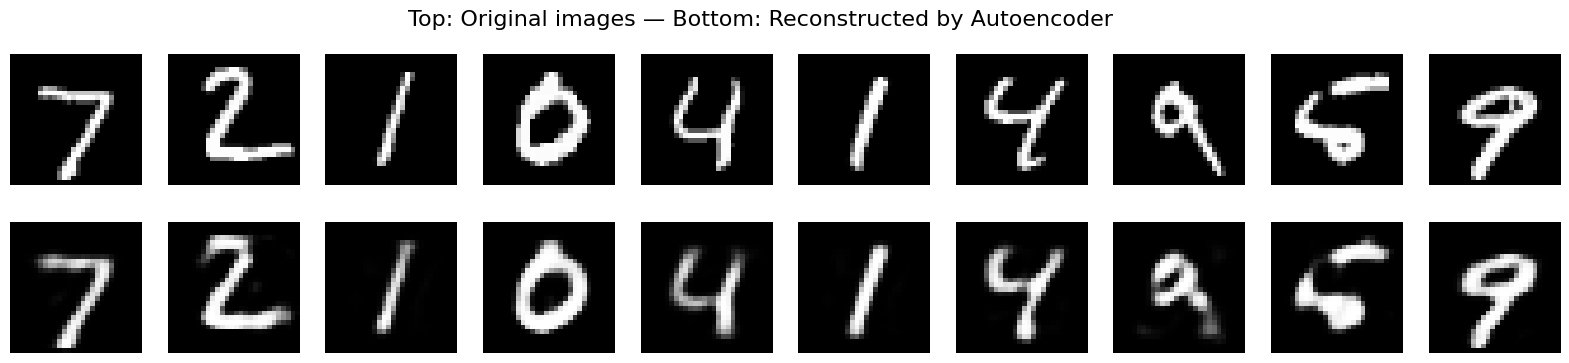

In [19]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.suptitle('Top: Original images — Bottom: Reconstructed by Autoencoder', fontsize=16)
plt.show()